In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats

truckTwoPath = "../data/trucks/truck1.csv"

truckTwoDictPath = "../data/dictionary/truck1_data_dictionary.csv"

In [2]:
def get_truck_data():
    trucks1 = pd.read_csv(os.path.join('../data/trucks/truck1.csv'),
               sep=',',engine='python')
    
    return trucks1

In [3]:
trucks1 = get_truck_data()

In [4]:
def readCsv(truck):
    return pd.read_csv(truck, header = [0])
    
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"], axis = 1)
    return noUTC

"""Takes a DataFrame and a conversion dictionary as parameters;
    uses the dictionary to rename all matching columns then returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

"""Finds threshold of Non-NA type using percentage and deletes rows."""

#If the number of values that are NOT Na type pass this percentage, the row will be deleted
rowNaNThresholdPercent = 75
def removeUnnecessaryRows(dataFrame):
    length = len(dataFrame.columns)
    TValue = (rowNaNThresholdPercent / 100) * length
    print("Threshold value: " + str(int(TValue)))
    return dataFrame.dropna(thresh = int(TValue))

"""Finds columns with all Na types and deletes them."""
def removeUnnecessaryColumns(dataFrame):
    return dataFrame.dropna(axis=1, how='all')

# NOTE: The following function is unused in this notebook, but it can be used to convert CSV files into
# conversion dictionaries i.e. creating the column rename dictionaries, which was manually done in the
# previous block manually.

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult



In [5]:
trucks1 = removeUnnecessaryColumns(trucks1)

In [6]:
trucks1 = removeUnnecessaryRows(trucks1)

Threshold value: 35


In [7]:
trucks1['EngineAirIntakeTemp_BB1_X_E'].mean()

27.59693043150082

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000105C2BF28>]],
      dtype=object)

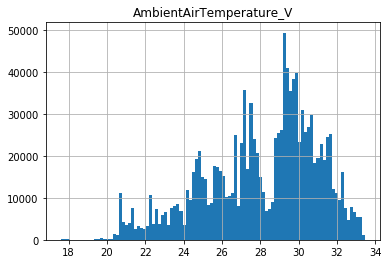

In [8]:
trucks1.hist(column="AmbientAirTemperature_V", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000DB5AA240>]],
      dtype=object)

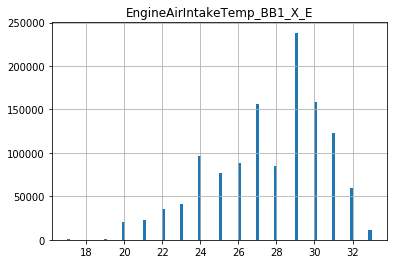

In [9]:
trucks1.hist(column="EngineAirIntakeTemp_BB1_X_E", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000105C2B4A8>]],
      dtype=object)

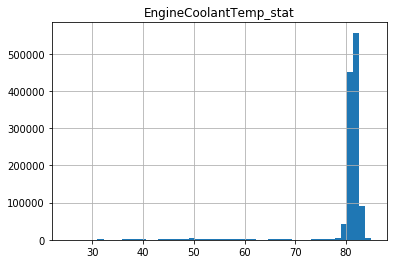

In [10]:
trucks1.hist(column='EngineCoolantTemp_stat', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002ED8A3C8>]],
      dtype=object)

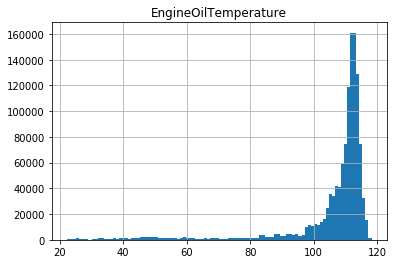

In [11]:
trucks1.hist(column='EngineOilTemperature', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002E1A67B8>]],
      dtype=object)

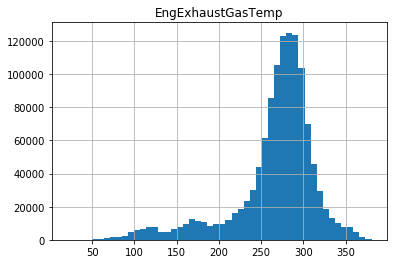

In [12]:
trucks1.hist(column='EngExhaustGasTemp', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000102C15358>]],
      dtype=object)

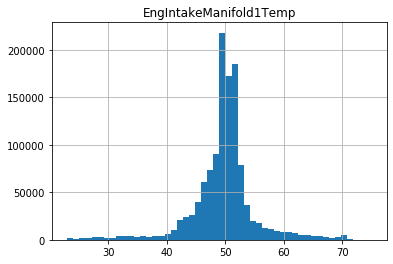

In [13]:
trucks1.hist(column='EngIntakeManifold1Temp', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000100FA10F0>]],
      dtype=object)

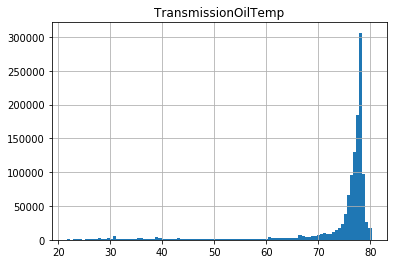

In [14]:
trucks1.hist(column='TransmissionOilTemp', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000101545A20>]],
      dtype=object)

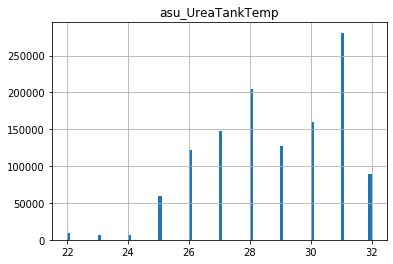

In [15]:
trucks1.hist(column='asu_UreaTankTemp', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000FC78B358>]],
      dtype=object)

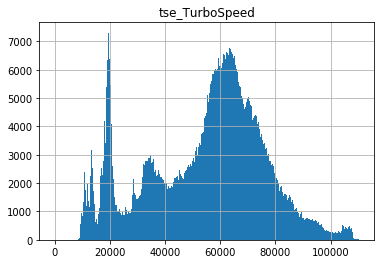

In [16]:
trucks1.hist(column='tse_TurboSpeed', bins=500)

In [17]:
trucks1['tse_TurboSpeed'].mean()

54876.66593589009

In [18]:
truck = trucks1['tse_TurboSpeed']

In [19]:
truck1 = trucks1[['AmbientAirTemperature_V']].ffill().bfill()

In [20]:
truck3 = trucks1[['EngineAirIntakeTemp_BB1_X_E']].ffill().bfill()

In [21]:
truck = trucks1[['tse_TurboSpeed']].ffill().bfill()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000F9D00518>]],
      dtype=object)

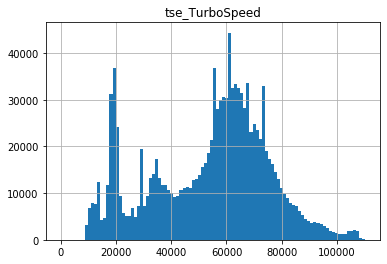

In [22]:
truck.hist(column='tse_TurboSpeed', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000100F3D550>]],
      dtype=object)

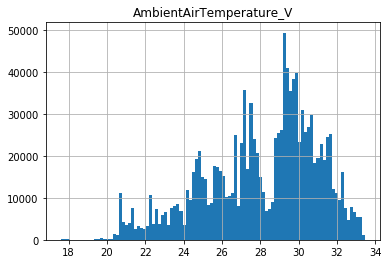

In [23]:
truck1.hist(column='AmbientAirTemperature_V', bins=100)

In [24]:
truck['tse_TurboSpeed'].mean()

54301.48128194424

In [25]:
truck1['AmbientAirTemperature_V'].mean()

28.080522496561002